In [1]:
import numpy as np
import pandas as pd
import string
from bokeh.plotting import figure, show, output_notebook, gridplot
from bokeh.models import HoverTool, ColumnDataSource, FuncTickFormatter
#import cx_Oracle
from bokeh.models.markers import Circle
import matplotlib.pyplot as plt

output_notebook()

Loading BokehJS ...

In [2]:
def genHeatMapFrmFile(csvfile):        
    pltcode = csvfile[:-4]
    with open(csvfile,'r') as f:
        content = f.readlines()
    ncontent = np.zeros(len(content))
    for i,j in enumerate(content):
        ncontent[i] = float(j[:-1]) #remove \n carriage return
    colCnt = int(len(ncontent)/16)
    ncontent=ncontent.reshape(16,colCnt).T.reshape(1,len(content))[0]
    nphist = np.histogram(a=ncontent,bins=8)
    colourBlue = list(reversed(['#084594', '#2171b5', '#4292c6', '#6baed6', '#9ecae1', '#c6dbef', '#deebf7', '#f7fbff']))
    lamDiff = lambda x: [abs(x-i) for i in nphist[1]].index(min([abs(x-i) for i in nphist[1]]))
    bin_colours=[]
    for i in ncontent:
        bin_category = lamDiff(i)
        bin_colours.append(bin_category)
    colours = [colourBlue[i] if i<8 else colourBlue[7] for i in bin_colours] #bc the binning has 9 elemnts due to bin edges
    xs = list(map(lambda x: [x]*16,list(range(3,15)))) 
    xs = [str(item) for sublist in xs for item in sublist] #flatten list
    strings = [i for i in string.ascii_uppercase[0:16]]*colCnt
    df = {'xs':xs,'ys':strings,'value':ncontent.tolist(),'colour':colours}
    output_file(f"{pltcode}_bokeh.html", title=f"Heatmap of {pltcode}", mode="cdn")
    p = figure(plot_width=1000,plot_height=1000,x_axis_location="above", tools="hover,save",
               title=f'Heatmap of {pltcode} 384-plate', 
               x_range=[str(i) for i in range(3,15)],
               y_range=list(reversed([i for i in string.ascii_uppercase[:16]])),
               tooltips = [('wellID', '@ys,@xs'), ('abs', '@value')])
    p.rect('xs', 'ys', 0.9, 0.9,source=df, color='colour',line_color='black')
    p.xaxis.major_label_text_font_style='bold'
    p.yaxis.major_label_text_font_style='bold'
    return p

In [2]:
dfm = pd.read_csv('14190301100.txt',encoding='utf-16',sep='\t',skiprows=2,skipfooter=2,engine='python')

In [4]:
dfm.head(10)

,Wavelength,Temperature(¡C),A1,A2,A3,A4,A5,A6,A7,A8,...,P16,P17,P18,P19,P20,P21,P22,P23,P24,Unnamed: 386
0,220,28.2,-0.046316,-0.047916,0.204984,0.215384,0.218284,0.184984,0.191684,0.193384,...,0.218284,0.218284,0.218284,0.218284,0.218284,0.218284,0.029284,0.218284,0.218284,NaN
1,230,28.3,-0.003822,-0.004722,0.102478,0.102478,0.102478,0.102478,0.102478,0.102478,...,0.102478,0.102478,0.102478,0.102478,0.102478,0.102478,0.036978,0.102478,0.102478,NaN
2,240,28.3,-0.027734,-0.026534,0.177966,0.149666,0.325466,0.184166,0.191266,0.153266,...,0.208166,0.159566,0.170366,0.139466,0.183366,0.210966,0.000266,0.208966,0.190666,NaN
3,250,28.3,-0.022066,-0.025966,0.060034,0.037034,0.178534,0.058234,0.068534,0.064634,...,0.110834,0.037034,0.046934,0.023334,0.082834,0.077234,-0.011566,0.078234,0.085634,NaN
4,260,28.3,-0.032922,-0.037422,0.010078,-0.001322,0.102678,0.022278,0.014978,0.023978,...,0.083178,0.034078,0.055178,0.011178,0.076878,0.058178,-0.010422,0.062278,0.076578,NaN
5,270,28.4,-0.074816,-0.083916,-0.058216,-0.053316,0.016584,-0.047916,-0.041916,-0.058516,...,0.001484,-0.009016,-0.002916,-0.018116,-0.004316,0.026484,-0.036016,0.029384,0.015384,NaN
6,280,28.4,-0.041988,-0.050287,-0.017088,-0.019987,0.063012,-0.008387,0.001112,-0.006088,...,0.014313,-0.003688,0.013912,-0.009888,0.022812,0.055112,-0.028587,0.044013,0.047912,NaN
7,290,28.4,0.006472,-0.003528,0.035872,0.024972,0.133272,0.040472,0.044372,0.023172,...,0.014172,0.002672,0.008872,0.000572,0.021772,0.072272,-0.023028,0.064172,0.055072,NaN
8,300,28.4,0.006244,0.000944,0.036144,0.027344,0.112444,0.032644,0.042944,0.016644,...,0.018144,0.019344,0.014944,0.013644,0.017244,0.069844,-0.009956,0.070944,0.042244,NaN
9,310,28.4,0.003744,-0.000156,0.027544,0.023244,0.087844,0.020844,0.038844,0.012744,...,0.019744,0.018544,0.012144,0.013044,0.012544,0.057044,-0.006756,0.065844,0.035044,NaN


In [3]:
wellIds=[]
for i in range(1,25):
    for j in range(1,25):
        wellIds.append(f'{chr(64+i)}{j}' )

In [35]:
def genLinePlot(dfm,colm,w,h):
    dfm = dfm.drop(dfm.columns[1], axis=1) #remove temperature
    dfm = dfm.drop(dfm.columns[len(dfm.columns)-1],axis=1) #remove last NaN column
    df = pd.DataFrame({'xs':dfm.Wavelength,'ys':dfm[f'{wellIds[colm]}']})
    source = ColumnDataSource(df)
    p = figure(plot_width=w, plot_height=h,title=f'{wellIds[colm]}')#,tooltips = [('wavelength', '@xs'), ('absorbance', '@ys')])
    p.line('xs','ys', line_width=3.25,source=source)
    #glyph = Circle(x="xs", y="ys", line_color="#3288bd", fill_color='#3288bd',line_width=1,size=6)
    #p.add_glyph(source, glyph)
    p.axis.visible = False
    p.toolbar.logo = None
    p.toolbar_location = None
    p.ygrid.grid_line_color = None
    p.xgrid.grid_line_color = None
    return p

In [11]:
def genLolOfLinePlts(dfm,dimens): #(mxn)
    plotLst = []
    for i in range(dimens[0]*dimens[1]):
        plotLst.append(genLinePlot(dfm,i,80,60)) #generate each line plot
    lol = [list(map(lambda x: x+(j-1)*dimens[1],list(range(1,dimens[1]+1)))) for j in range(1,dimens[0]+1)] #initialise list of lists
    cnt = 0
    for i in range(dimens[0]):
        for j in range(dimens[1]):
            lol[i][j] = plotLst[cnt]
            cnt+=1
    return lol

In [33]:
lol=genLolOfLinePlts(dfm,(16,24))

In [34]:
p = gridplot(lol,toolbar_options={'logo':None})
show(p)

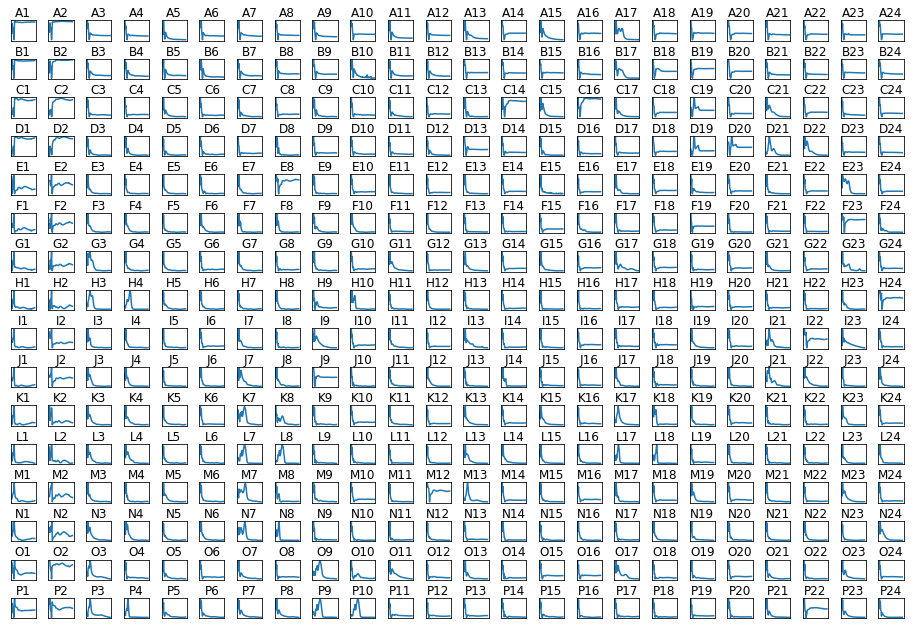

In [40]:
fig, ax = plt.subplots(16,24,figsize=(16,11))
fig.subplots_adjust(wspace=0.5,hspace=0.9)
cnt=0
dfm_strip = dfm.drop(dfm.columns[0], axis=1) #remove wavelength
dfm_strip = dfm_strip.drop(dfm.columns[1], axis=1) #remove temperature
dfm_strip = dfm_strip.drop(dfm.columns[len(dfm.columns)-1],axis=1) #remove last NaN column
for i in range(16):
    for j in range(24):
        ax[i,j].plot(dfm.Wavelength,
                     dfm_strip[f'{wellIds[cnt]}'],    
                    )
        ax[i,j].set_title(f'{dfm_strip.columns[cnt]}')
        ax[i,j].title.set_position([.5, .8])
#        ax[i,j].set_yticklabels([])
#        ax[i,j].set_xticklabels([])
        ax[i,j].tick_params(
            which='both',      # both major and minor ticks are affected
            bottom=False,      # ticks along the bottom edge are off
            left=False,         # ticks along the top edge are off
            labelbottom=False,
            labelleft=False)
        cnt+=1

In [68]:
max_df = dfm.iloc[:,2:len(dfm.columns)-1].max().max()
min_df = abs(dfm.iloc[:,2:len(dfm.columns)-1]).min().min()
nphist = np.linspace(min_df,max_df,num=18)

In [8]:
def genHMcsv(csvfile,row):
    pltcode = csvfile[:-4]
    dfm = pd.read_csv(csvfile,encoding='utf-16',sep='\t',skiprows=2,skipfooter=2,engine='python')
    min_df = dfm.iloc[:,2:len(dfm.columns)-1].min().min()
    max_df = dfm.iloc[:,2:len(dfm.columns)-1].max().max()
    dfm_row = dfm.iloc[row,0:len(dfm.columns)-1]
    wavelength = dfm_row[0]
    dfm_rowFilter = dfm_row.iloc[2:]
    colCnt = int(len(dfm_rowFilter)/16)
    dfm_array = np.array(dfm_rowFilter).reshape(16,colCnt)
    #nphist = np.histogram(a=dfm_array,bins=8)
    nphist = np.linspace(min_df,max_df,num=18)
    colourBlue = [ '#E3E6E8', '#E0E7EB', '#DEE8ED', '#DBE9F0', '#D9EAF2', '#D6EBF5', '#D4EBF7', '#D1ECFA', '#CFEDFC', '#CCEEFF', '#A8D8F0', '#A3DAF5', '#9EDBFA', '#99DDFF', '#7DC4E8', '#75C7F0', '#6EC9F7', '#66CCFF' ]
    lamDiff = lambda x: [abs(x-i) for i in nphist].index(min([abs(x-i) for i in nphist]))
    colours=[]
    for i in range(dfm_array.shape[0]):
        for j in range(dfm_array.shape[1]):
            if dfm_array[i,j] < 0:
                colours.append('#5C6970')
            else:
                colours.append(colourBlue[lamDiff(dfm_array[i,j])])
    xs = list(map(lambda x: [x]*16,list(range(24)))) 
    xs = [str(item) for sublist in xs for item in sublist] #flatten list
    strings = [i for i in string.ascii_uppercase[0:16]]*colCnt
    df = pd.DataFrame({'xs':xs,'ys':strings,'value':dfm_array.flatten('C').tolist(),'colour':colours})
    p = figure(plot_width=900,plot_height=600,x_axis_location="above", tools="hover",
               title=f'Heatmap of {pltcode} 384-plate at {int(wavelength)}nm', 
               x_range=df['xs'].drop_duplicates(),#[str(i) for i in range(24)],
               y_range=list(reversed(df['ys'].drop_duplicates())),#list(reversed([i for i in string.ascii_uppercase[:16]])),
               tooltips = [('wellID', '@ys,@xs'), ('abs', '@value')])
    p.rect('xs', 'ys', 0.9, 0.9,source=ColumnDataSource(df), fill_color='colour',line_color='black')
    p.xaxis.major_label_text_font_style='bold'
    p.yaxis.major_label_text_font_style='bold'
    label_dict = {}
    for i, s in enumerate(df['xs'].drop_duplicates()):
        label_dict[i] = str(int(s) + 1)
    p.xaxis.formatter = FuncTickFormatter(code=""" 
        var labels = %s;
        return labels[tick];
    """ % label_dict) #change x-axis tick labels
    return p


In [16]:
plot = genHMcsv('14190301100.txt',25)
show(plot)

In [ ]:
pltcode = '14160906'
suffix='200'
c = con.cursor()
r = c.execute(f"SELECT PLATE_POSITION,READING FROM WELL_ABSORBANCE WHERE PLATE_CODE='{pltcode}' AND PLATE_SUFFIX = '{suffix}' ORDER BY PLATE_POSITION")
res = r.fetchall()
len([i[1] for i in res])


In [115]:
def genHeatMapFromSQL(pltcode,suffix):
    c = con.cursor()
    r = c.execute(f"SELECT PLATE_POSITION,READING FROM WELL_ABSORBANCE WHERE PLATE_CODE='{pltcode}' AND PLATE_SUFFIX = '{suffix}' ORDER BY PLATE_POSITION")
    res = r.fetchall()
    abs_reading = [i[1] for i in res] 
    len_reading = len(abs_reading)
    colCnt = int(len_reading/16)
    abs_reading=np.array(abs_reading).reshape(16,colCnt).T.reshape(1,len_reading)[0]
    nphist = np.histogram(a=abs_reading,bins=8)
    colourBlue = list(reversed(['#084594', '#2171b5', '#4292c6', '#6baed6', '#9ecae1', '#c6dbef', '#deebf7', '#f7fbff']))
    lamDiff = lambda x: [abs(x-i) for i in nphist[1]].index(min([abs(x-i) for i in nphist[1]]))
    bin_colours=[]
    for i in abs_reading:
        bin_category = lamDiff(i)
        bin_colours.append(bin_category)
    colours = [colourBlue[i] if i<8 else colourBlue[7] for i in bin_colours] #bc the binning has 9 elemnts due to bin edges
    xs = list(map(lambda x: [x]*16,list(range(3,colCnt+3)))) 
    xs = [str(item) for sublist in xs for item in sublist] #flatten list
    strings = [i for i in string.ascii_uppercase[0:16]]*colCnt
    df = {'xs':xs,'ys':strings,'value':abs_reading,'colour':colours}
    p = figure(plot_width=500,plot_height=500,x_axis_location="above", tools="hover,save",
               title=f'384-plate Heatmap of {pltcode} / {suffix}', 
               x_range=[str(i) for i in range(3,colCnt+3)],
               y_range=list(reversed([i for i in string.ascii_uppercase[:16]])),
               tooltips = [('wellID', '@ys,@xs'), ('abs', '@value')])
    p.rect('xs', 'ys', 0.9, 0.9,source=df, color='colour',line_color='black')
    p.xaxis.major_label_text_font_style='bold'
    p.yaxis.major_label_text_font_style='bold'
    p.xgrid.grid_line_color = None
    p.ygrid.grid_line_color = None
    p.toolbar.logo = None
    return p

In [100]:
def dplyHeatMap(csvfile,compare=False,suffix=None):
    if compare:
        p1 = genHeatMapFromSQL(csvfile,'100')
        p2 = genHeatMapFromSQL(csvfile,'200')
        show(row(p1,p2))
    if suffix and not compare:
        show(genHeatMapFromSQL(csvfile,suffix))

In [116]:
dplyHeatMap('14170404',True)